<a href="https://colab.research.google.com/github/Arkantrust/r-universe/blob/main/module_5/module_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la Visualización de Datos

En este quinto módulo iniciaremos el estudio de cómo crear visualizaciones con el paquete `ggplot2` y la gramática detrás de las visualizaciones. En particular, nos concentraremos en visualizaciones para mostrar la distribución de datos.

Al finalizar este módulo estarás en capacidad de emplear el paquete ggplot2 de R para:

- Reconocer las capas de una visualización.
- Construir  un histograma
- Construir un gráfico de barras
- Construir un gráfico de cajas

Vea [este video](https://youtu.be/IVkn7spjZ1Q) y [este otro](https://www.youtube.com/watch?v=IVkn7spjZ1Q).

In [ ]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# lo cargamos de una vez
install.packages("gapminder")
library(gapminder)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data("gapminder")

glimpse(gapminder)

Rows: 1,704
Columns: 6
$ country   <fct> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan", …
$ continent <fct> Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, …
$ year      <int> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, …
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 40.8…
$ pop       <int> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372, 12…
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.1134, …


# Filtrando

Ya tenemos claro los elementos fundamentales de R y podemos filtrar observaciones, resumir grupos de casos y crear y transformar variables empleando el paquete dplyr.  Ahora en los siguientes dos módulos concentremos nuestra atención en el paquete ggplot2 que nos permitirá visualizar los datos.

Empezaremos por entender la lógica del paquete y la gramática detrás de las visualizaciones. Tu primera actividad será leer los Capítulos 1 y 2 del libro ["Empezando a visualizar datos con R y ggplot2"](https://www.icesi.edu.co/editorial/empezando-visualizar-web/).

## Capas de ggplot

Veamos cada uno de estas capas (layers en inglés):

### Data

Es la base fundamental para construir la visualización y por tanto es una parte obligatoria en la construcción de una visualización en este paquete. Debe estar en un objeto de clase `data.frame` o `tibble`.

**Aesthetics**: en esta capa se indican las variables que se van a “mapear” (graficar) en los diferntes elementos del gráfico, como ejemplo los ejes, el color y el tamaño de los puntos. Una traducción literal de esta capa sería “estética”, pero de pronto no es una buena traducción. Esta capa indica qué variables del data.frame se mapean a el eje horizontal (denotado por x) y cuál al eje vertical (y). También podemos mapear en esta capa el color (col), como en la Figura 2.1 donde el continente (que es una variable cualitativa) se mapeó al color de cada punto (col = continent). En dicha figura, la variable cuantitativa PIB percápita se representa en el eje horizontal (x = gdpPercap) y la esperanza de vida al nacer (variable cuantitativa) en el eje vertical (y = lifeExp). Adicionalmente, podemos mapear variables (si tiene sentido) al tamaño (size) y otros elementos como la forma del punto. Al igual que la primera capa, esta es obligatoria; constituyéndose, con la capa de los datos, en uno de los tres pilares de cualquier visualización que armemos con ggplot2. Esta capa es conocida en el paquete como aes.


  Geometría: esta capa le indica a R qué tipo de visualización se desea obtener. Es decir, cuál es la geometría que se desea adoptar para mostrar los datos. Por ejemplo, la geometría podría ser emplear barras, líneas, puntos, histogramas, entre otros. En el caso particular de la Figura 2.1 la geometría seleccionada fue los puntos (geom_point). Hay distintas opciones que se explorarán más adelante en los Capítulos 3, 4 y 5. Esta capa es obligatoria y constituye el tercer pilar indispensable en toda visualización de ggplot2.

  Facets: esta capa permite descomponer un gráfico en sub-gráficos (cuadrículas o facetas) según una variable cualitativa. Por ejemplo, en vez de usar colores para distinguir los continentes, como se hace en la Figura 2.1, podríamos construir 5 sub-gráficos cada uno para un continente como en la Figura 2.6. Las facetas sirven para comparar grupos, separándolos y así facilitando la identificación de los grupos. No es una capa obligatoria.

  Estadísticas: esta capa permite adicionar información estadística que permita resumir los datos. Por ejemplo, se puede adicionar una línea de tendencia para los datos. No es obligatoria.

  Escalas: esta capa permite indicar en qué escala se presentan los datos en cada uno de los ejes. Por ejemplo, en algunas ocasiones se podría desear presentar uno de los dos ejes en escala logarítmica. No es obligatoria.

  Coordenadas: esta capa determina cómo se combinan las variables seleccionas para los ejes x (horizontal) y y (vertical) en la capa de estética. En últimas esta capa define el espacio en el que se mapearán los datos. Por ejemplo, en algunas ocasiones será útil poner límites a los ejes, intercambiar lo que se presenta en un eje con el otro, o asegurarnos que los dos ejes tienen la misma magnitud.

  Tema: capa destinada a la apariencia final de la gráfica. Podemos encontrar unos temas predeterminados cargados con el paquete ggplot2 y también se puede crear un tema para que se adapte a la imagen institucional o al tipo de diseño de todo el documento. También existen algunos paquetes que incluyen temas adicionales. Aquí se modifica el color del fondo, ejes, tamaños, grilla, posición de los nombres de los ejes, entre otros. No es obligatoria.


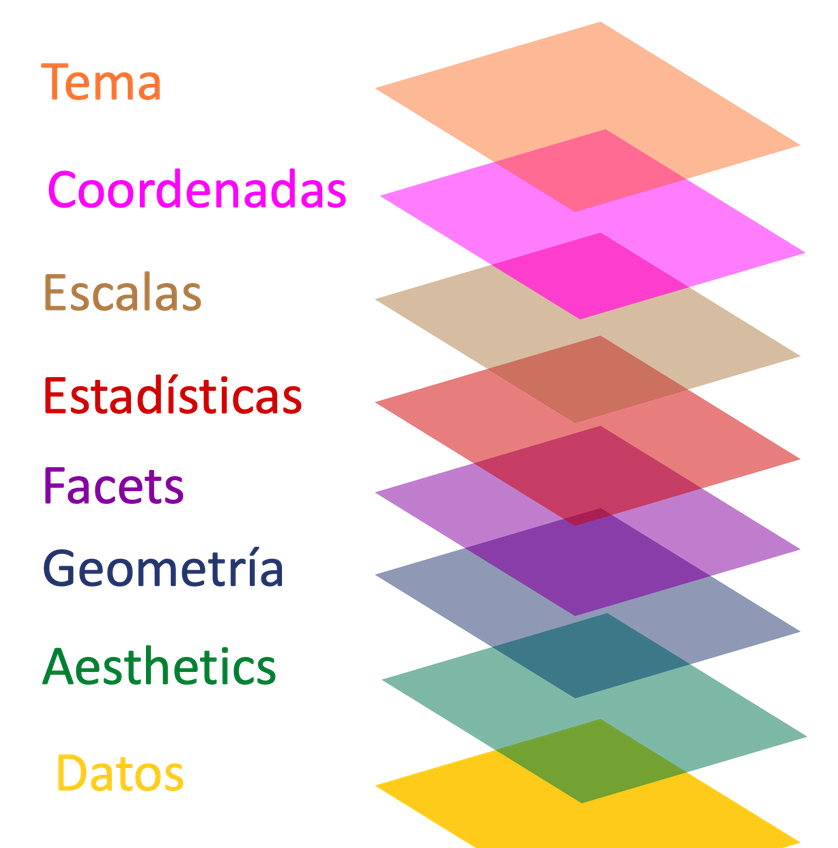

## Ejemplo

Usaremos el paquete `gapminder` para graficar la relación entre PIB percápita y Expectativa de vida al nacer por país (1952 - 2007).

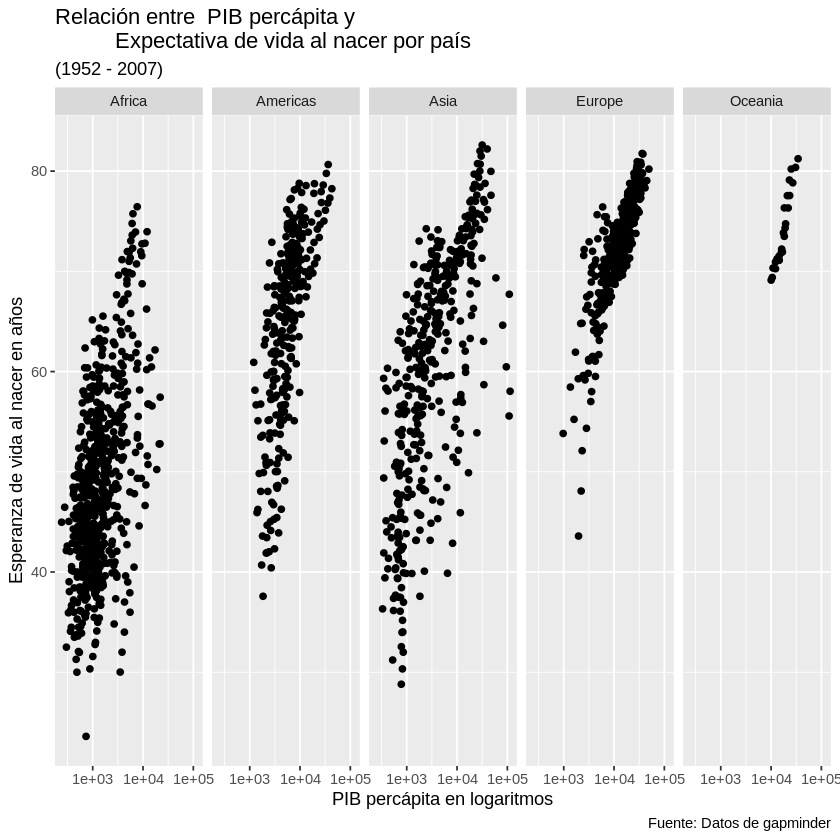

In [ ]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp))+
  geom_point()+
  facet_grid(~continent)+
  scale_x_log10() +
  labs(
  title = "Relación entre  PIB percápita y
          Expectativa de vida al nacer por país",
  subtitle = "(1952 - 2007)",
  caption = "Fuente: Datos de gapminder") +
  xlab("PIB percápita en logaritmos") +
  ylab("Esperanza de vida al nacer en años")

`geom_smooth()` using formula = 'y ~ x'


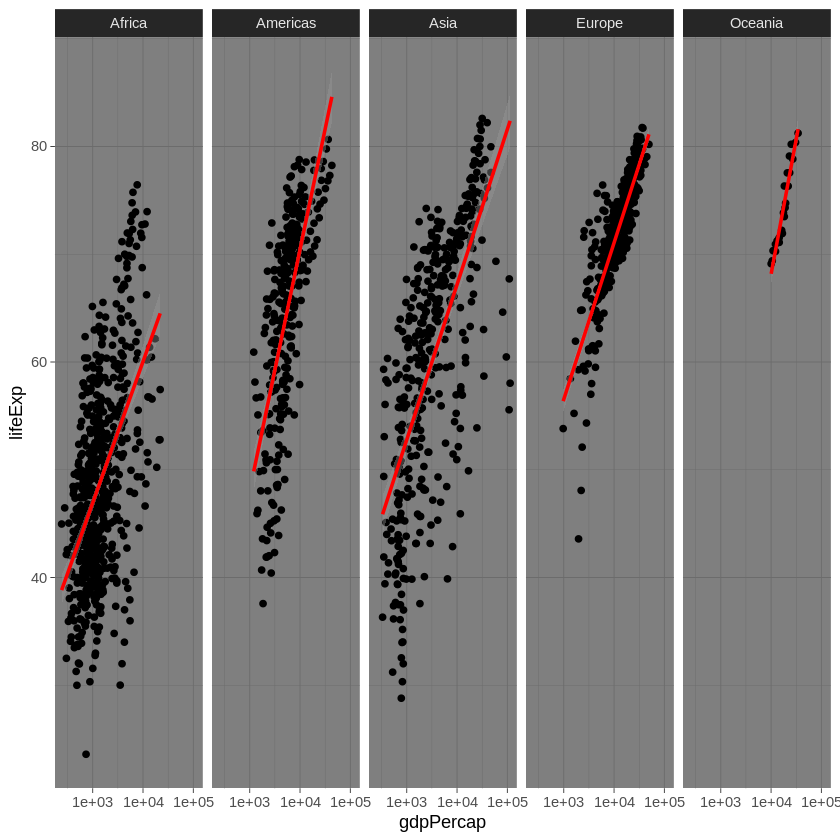

In [ ]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp)) +
  geom_point() +
  facet_grid(~continent) +
  scale_x_log10() +
  stat_smooth(method="lm", col="red") +
  # theme_minimal(), theme_classic(), theme_bw()
  theme_dark()

## Actividad 1

1. El orden "natural" de las capas de una visualización que se construya en ggplot2 es `Datos, Aesthetics, Geometría, Tema`.

2. La capa que permite definir (mapear) cuál variable irá en el eje horizontal (x) y eje vertical (y) es `Aesthetics`.

3. La capa en la que se especifica qué tipo de visualización (por ejemplo un gráfico de dispersión ) se empleará es `Geometría`.

# Geometrías para mostrar distribución

Ya tenemos clara la gramática empleada para la construcción de visualizaciones. Ahora, concentremos en aquellas visualizaciones que permiten mostrar la distribución de una o varias variables.  

Lee el Capítulo 3 del libro ["Empezando a visualizar datos con R y ggplot2"](https://www.icesi.edu.co/editorial/empezando-visualizar-web/).

## ¿Qué queremos mostrar?

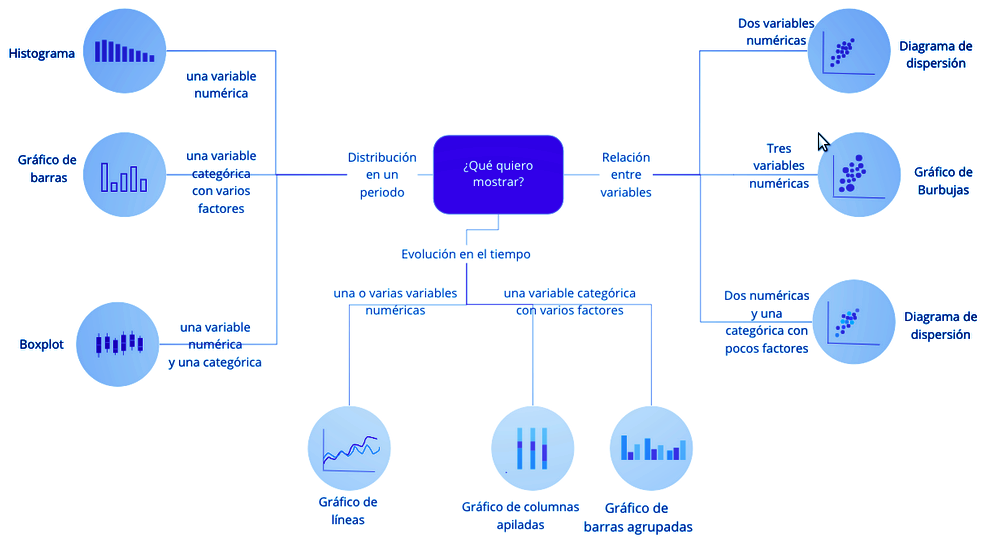

## Histograma

Los histogramas están diseñados para mostrar la distribución de una variable de clase numeric (variables cuantitativas contínuas) o de clase integer (variables cuantitativas discretas). Un histograma agrupa los datos en intervalos pequeños que se miden típicamente en el eje horizontal y en el eje vertical se representa la frecuencia de aparición de las observaciones dentro de los límites del intervalo. La función para este tipo de gráficos es `geom_histogram()`.

Veamos un ejemplo con los datos del objeto gapminder. Representemos la distribución de la expectativa de vida al nacer de todos lo países para el año 2007.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


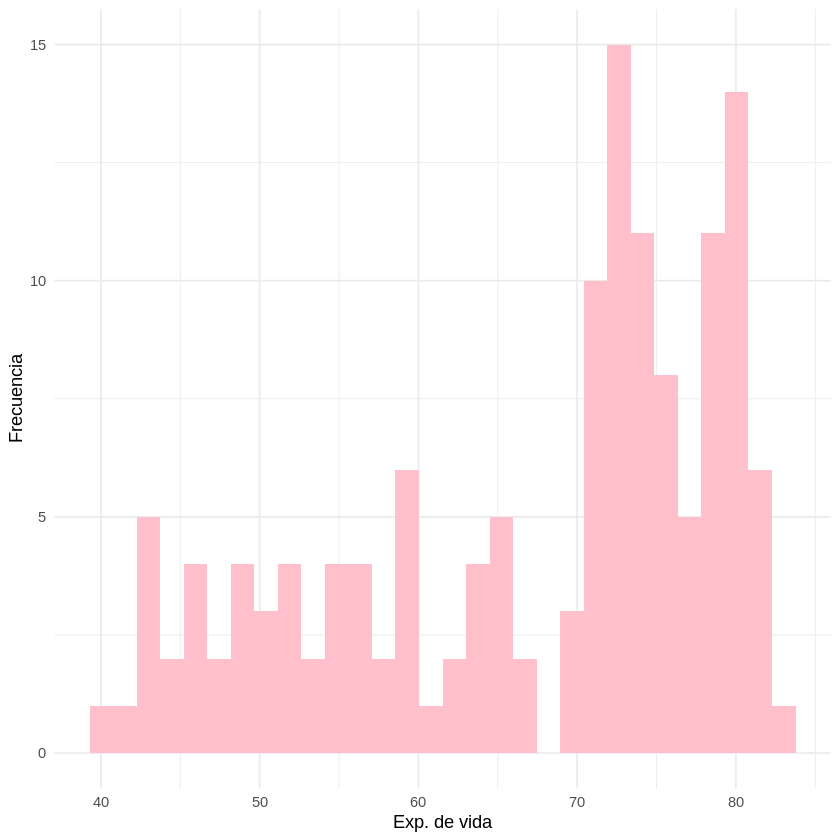

In [ ]:
gapminder %>%
  filter(year == 2007) %>%
  ggplot(aes(x = lifeExp)) +
    geom_histogram(fill = "pink") +
    labs( y="Frecuencia",
          x="Exp. de vida") +
    theme_minimal()

## Gráfico de barras

Los gráficos de barras permiten visualizar la distribución de una variable cualitativa; es decir, variables de clase character o factor. Este gráfico muestra con barras cuál es la frecuencia con que se observa cada uno de los posibles valores de la variable cualitativa. Este tipo de gráficos se puede construir con la función `geom_bar()`.

Por ejemplo, consideremos la variable continent que es un factor con cinco posibles valores. Visualicemos cómo es la distribución de países por continente en los datos de gapminder para el 2007. Es decir, contemos cuántas veces se repite cada continente en los datos de 2007.

> A list of all R built-in colors can be printed using `colors()`

In [ ]:
head(colors())

[1] "white"         "aliceblue"     "antiquewhite"  "antiquewhite1"
[5] "antiquewhite2" "antiquewhite3"

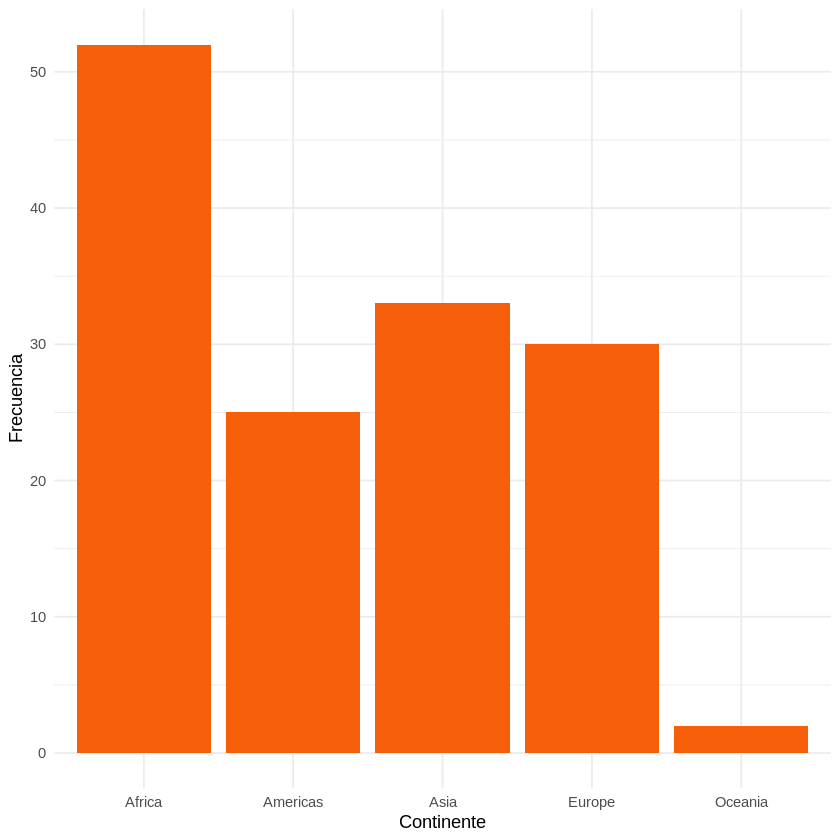

In [ ]:
gapminder %>%
  filter(year == 2007) %>%
  ggplot(aes(x = continent)) +
    geom_bar(fill = "#F65E0A") + # colors can also be in Hexadecimal format
    labs( y="Frecuencia",
          x="Continente") +
    theme_minimal()

La misma información anterior puede mostrarse de manera relativa (como porcentaje de todos los países) y no de manera absoluta (el número de países por continente). Este gráfico se conoce como un **gráfico de barras de porcentajes**. Esto lo podemos hacer de varias formas. Una forma es crear una base de datos con una columna que tenga el nombre del continente y otra con el porcentaje de países que el respectivo continente representa. Otra forma es modificar el código anterior, para calcular dicho porcentaje directamente en la función.

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


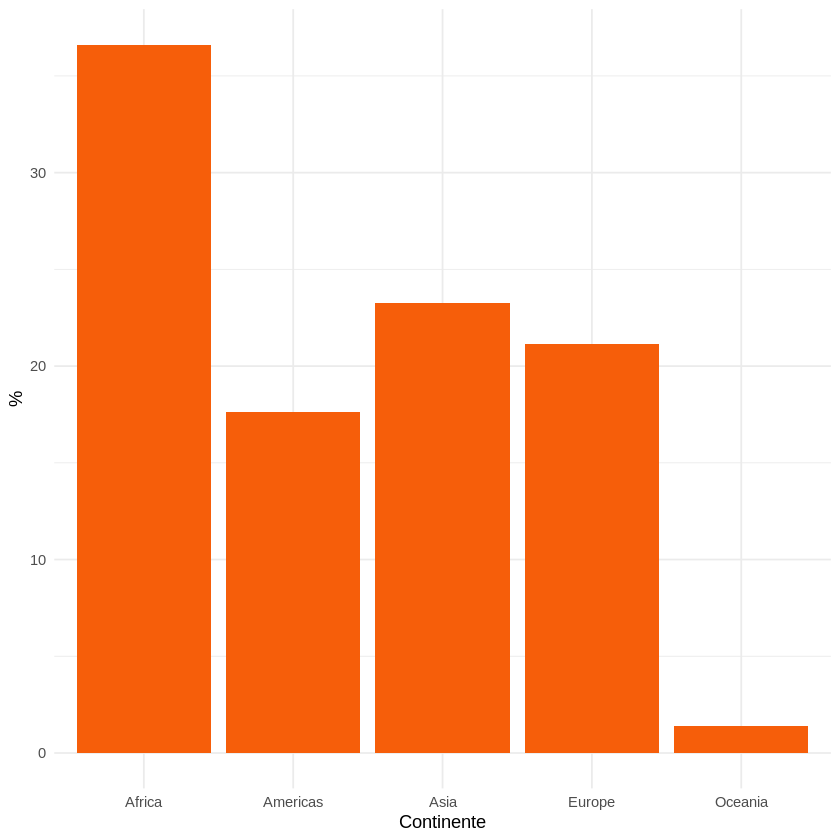

In [ ]:
gapminder %>%
  filter(year == 2007) %>%
  ggplot(aes(x = continent,
            y=100 * (..count..)/sum(..count..))) +
  geom_bar( fill = "#F65E0A") +
  labs( y="%",
        x="Continente") +
  theme_minimal()

## Boxplot

Los Boxplot son conocidos como diagrama de cajas y bigotes o diagrama de cajas. Estos gráficos **requieren de una audiencia con una formación en estadística para poder transmitir bien los mensajes poderosos que revelan**. Este gráfico es muy empleado para comparar la distribución de una variable cuantitativa para los diferentes valores posibles de una variable cualitativa. Típicamente, la variable cualitativa se representa en el eje horizontal y en el eje vertical se representa la variable cuantitativa. La función que permite construir este gráfico es `geom_boxplot()`.


Recordemos que esta visualización permite observar el primer, segundo y tercer cuartil, la distancia intercuartílica y la existencia o no de datos atípicos. La siguiente figura permitirá recordar la interpretación de este gráfico.

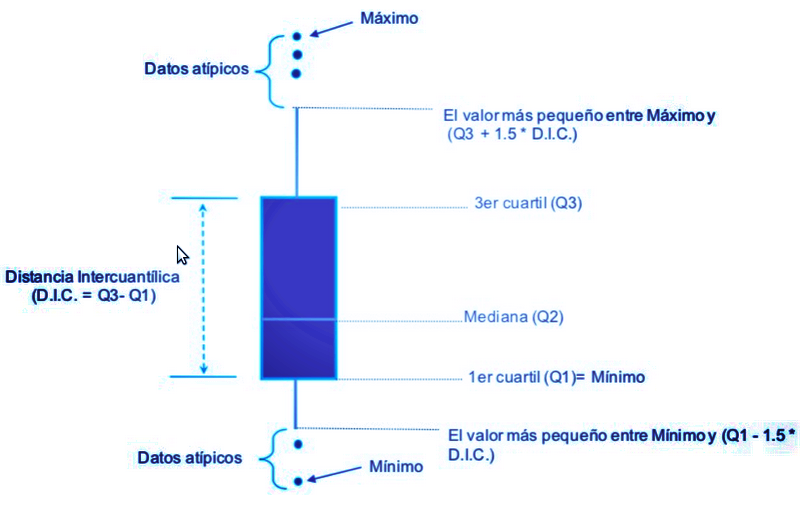

Visualicemos la distribución de la esperanza de vida al nacer por continente para el año 2007.

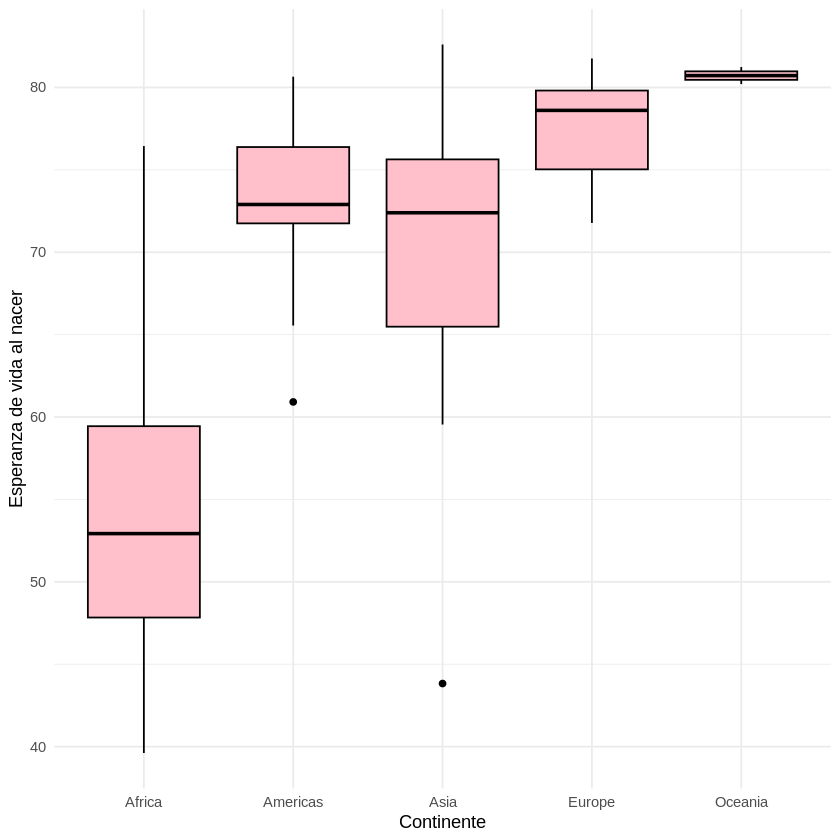

In [ ]:
gapminder %>%
  filter(year == 2007) %>%
  ggplot(aes(x = continent, y = lifeExp)) +
    geom_boxplot(fill = "pink",
                 col = "black" ) +
    labs( y="Esperanza de vida al nacer",
          x="Continente") +
    theme_minimal()

## Otras Geometrías

Es importante anotar que existen otras visualizaciones no tan comunes para mostrar distribución.

- Gráfico de Densidad

- [Diagrama de Violines](https://www.youtube.com/watch?v=FQZzjb2LiK8)

- Gráfico de Donas

- Gráfico de waffles

- Gráfico de bombones

- Treemaps

- Mapas de Calor

- Diagramas de Sankey

- [Nubes de palabras](https://www.youtube.com/watch?v=EvDAbWPMqiQ)

Si te interesa conocer más de estas visualizaciones puedes encontrar una amplia [documentación en línea](https://medium.com/number-around-us/shapes-of-understanding-exploring-ggplot2s-geometries-b92e0cdd4e4a) mantenida por la [comunidad de usuarios de R y ggplot2](https://www.rdocumentation.org/packages/ggplot2/versions/3.5.0).

## Ejercicios

En este taller trabajaremos nuevamente con una base de datos que incluye una lista completa de películas y series disponibles en varias plataformas de streaming. Esta base está en el archivo movies_shows.txt 1. La base de datos contiene las siguientes 9 variables:

Title: Nombre de la serie o película

Year : Año

Age: Clasificación por edades de las películas

Rotten.Tomatoes: Calificación de la serie o película en Rotten Tomatoes[https://www.rottentomatoes.com]. La calificación máxima es 100.

Netflix : Una variable cualitativa que representa la presencia o no de la serie o película en esta plataforma. Toma el valor de 1 si la serie o película está en Netflix y 0 en caso contrario

Hulu: Una variable cualitativa que representa la presencia o no de la serie o película en esta plataforma. Toma el valor de 1 si la serie o película está en Hulu y 0 en caso contrario

Prime.Video: Una variable cualitativa que representa la presencia o no de la serie o película en esta plataforma. Toma el valor de 1 si la serie o película está en Prime.Video y 0 en caso contrario

Disney.: Una variable cualitativa que representa la presencia o no de la serie o película en esta plataforma. Toma el valor de 1 si la serie o película está en Disney+ y 0 en caso contrario

Type: Una variable cualitativa que representa si se trata de una serie o película. Toma el valor de 1 si se trata de una serie y 0 si es una película

En un taller pasado creamos el objeto movies.shows en el que cargamos la base de datos disponible en el archivo movies_shows.txt. Ese objeto y otros que teníamos en ese momento en el working space los guardamos con el nombre `Ws_ejer_cap_8.RData`.

Carga el archivo.




In [ ]:
load("Ws_ejer_cap_8.RData")

### Ejercicio 1

a. Crea un histograma para ver cuál es la distribución de los años de las películas que se encuentran en la plataforma Netflix.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


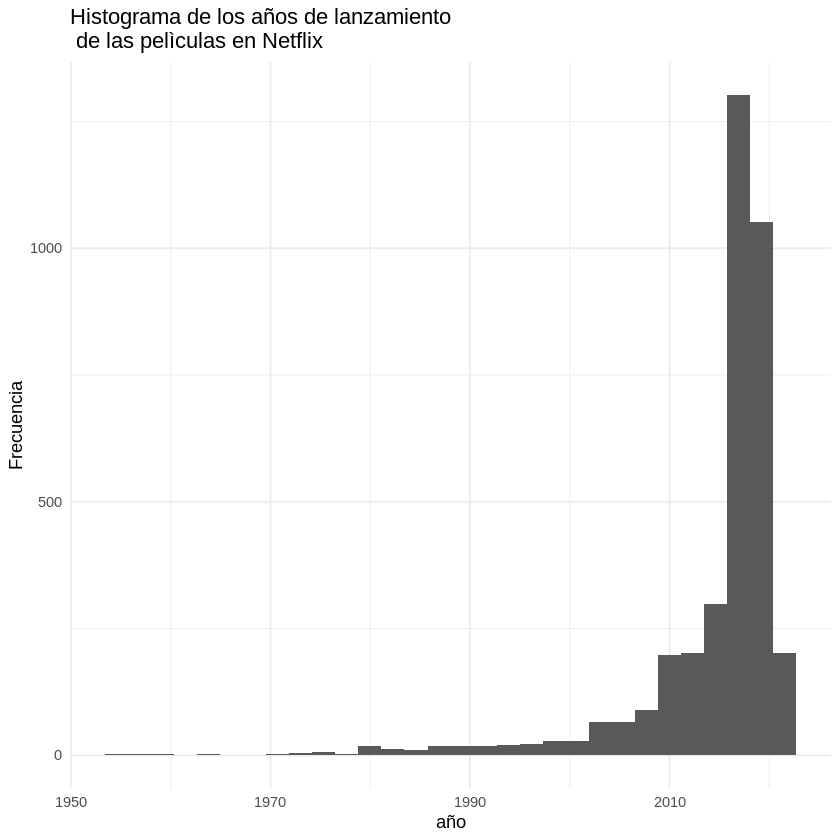

In [ ]:
movies.shows %>%
  filter( Type == 0) %>% # filtrado de sólo películas
  filter(Netflix == 1) %>% # filtrado de plataforma netflix
  ggplot(aes(x = Year)) +
    geom_histogram() +
   labs( title= "Histograma de los años de lanzamiento \n de las pelìculas en Netflix",
         y = "Frecuencia",
          x = "año") +
    theme_minimal()

b. Ahora crea visualiza la clasificación de las películas presentes en la plataforma Netflix.

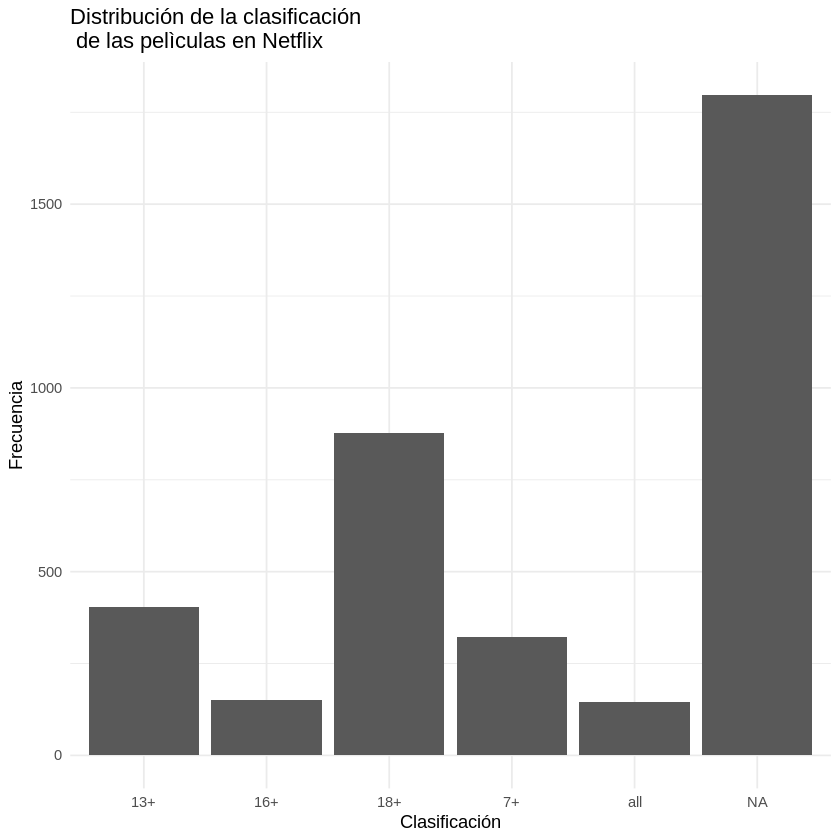

In [ ]:
movies.shows %>%
  filter( Type == 0) %>% # filtrado de sólo películas
  filter(Netflix == 1) %>% # filtrado de plataforma netflix
  ggplot(aes(x = Age)) +
    geom_bar() +
   labs( title= "Distribución de la clasificación \n de las pelìculas en Netflix",
         y = "Frecuencia",
          x = "Clasificación") +
    theme_minimal()

c. Ahora crea una visualización que permita comparar la valoración en Rotten Tomatoes de las películas de Netflix para cada una de las clasificaciones de estas.

Warning message:
“Removed 7 rows containing non-finite values (`stat_boxplot()`).”


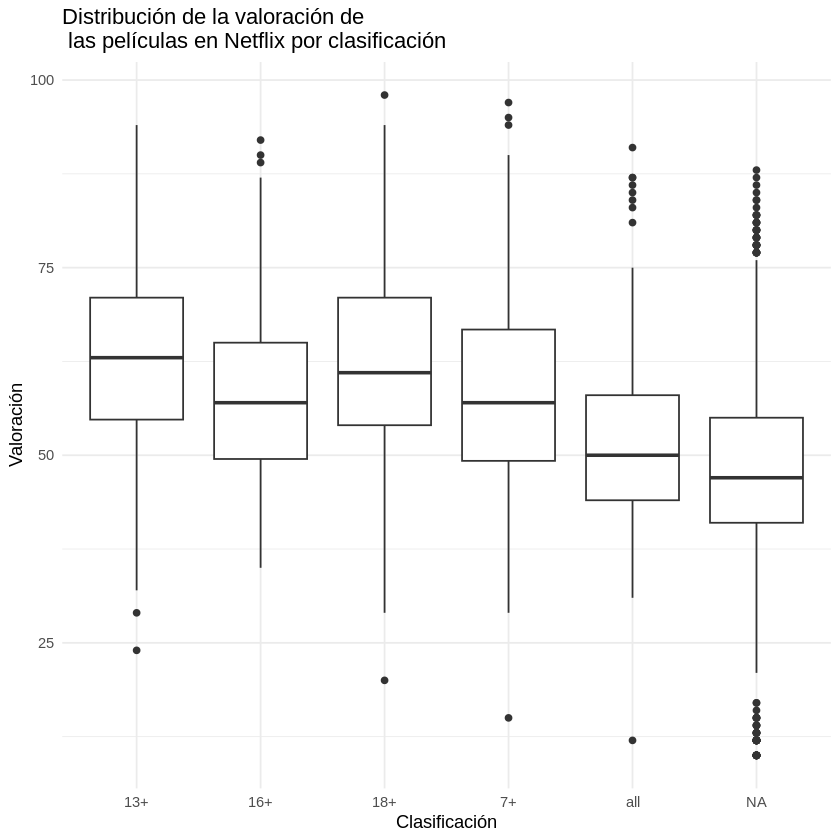

In [ ]:
 movies.shows %>%
  filter( Type == 0) %>% # filtrado de sólo películas
  filter(Netflix == 1) %>% # filtrado de plataforma netflix
  ggplot(aes(x =  Age, y = Rotten.Tomatoes)) +
    geom_boxplot() +
   labs( title= "Distribución de la valoración de \n las películas en Netflix por clasificación",
         y = "Valoración",
          x = "Clasificación") +
    theme_minimal()

### Ejercicio 2

a. Realiza las mismas visualizaciones que realizaste en el punto anterior, pero para las películas de la plataforma Disney Plus.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


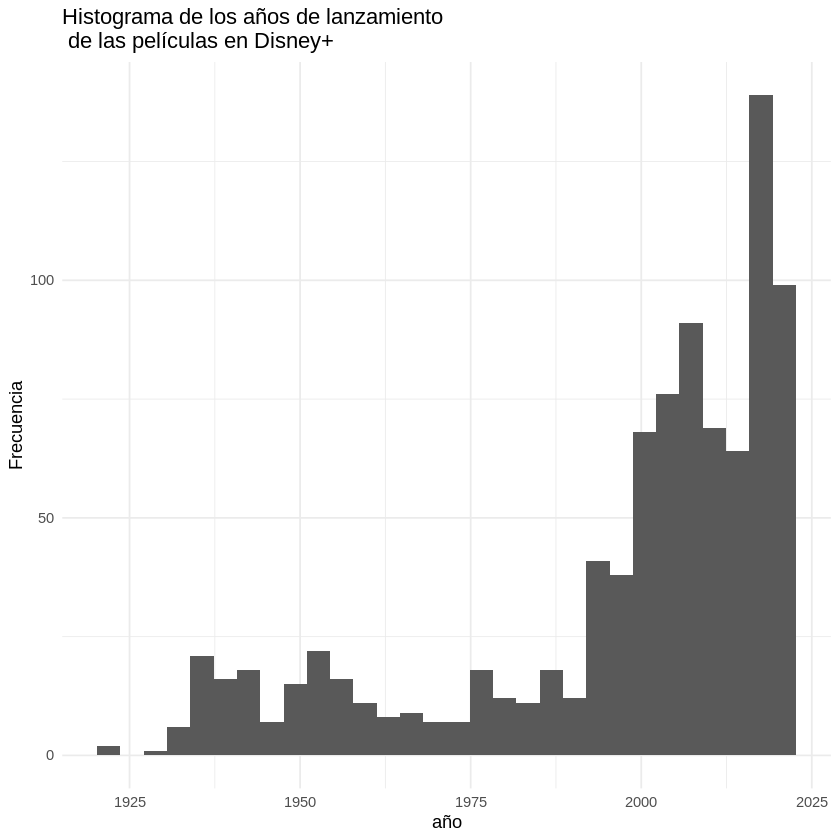

In [ ]:
 movies.shows %>%
  filter( Type == 0) %>% # filtrado de sólo películas
  filter(Disney. == 1) %>% # filtrado de plataforma Disney
  ggplot(aes(x = Year)) +
    geom_histogram() +
   labs( title= "Histograma de los años de lanzamiento \n de las películas en Disney+",
         y = "Frecuencia",
          x = "año") +
    theme_minimal()

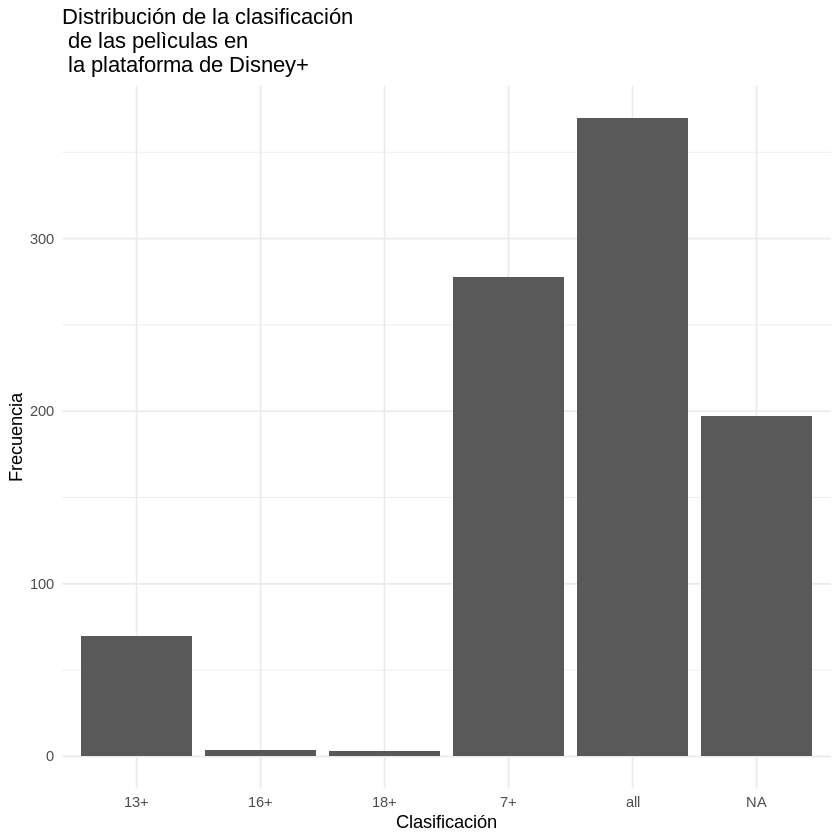

In [ ]:
movies.shows %>%
  # filtrado de sólo películas
  filter( Type == 0) %>%
  # filtrado de plataforma netflix
  filter(Disney. == 1) %>%
  ggplot(aes(x = Age)) +
    geom_bar() +
   labs( title= "Distribución de la clasificación  \n de las pelìculas en   \n la plataforma de Disney+",
         y = "Frecuencia",
          x = "Clasificación") +
    theme_minimal()

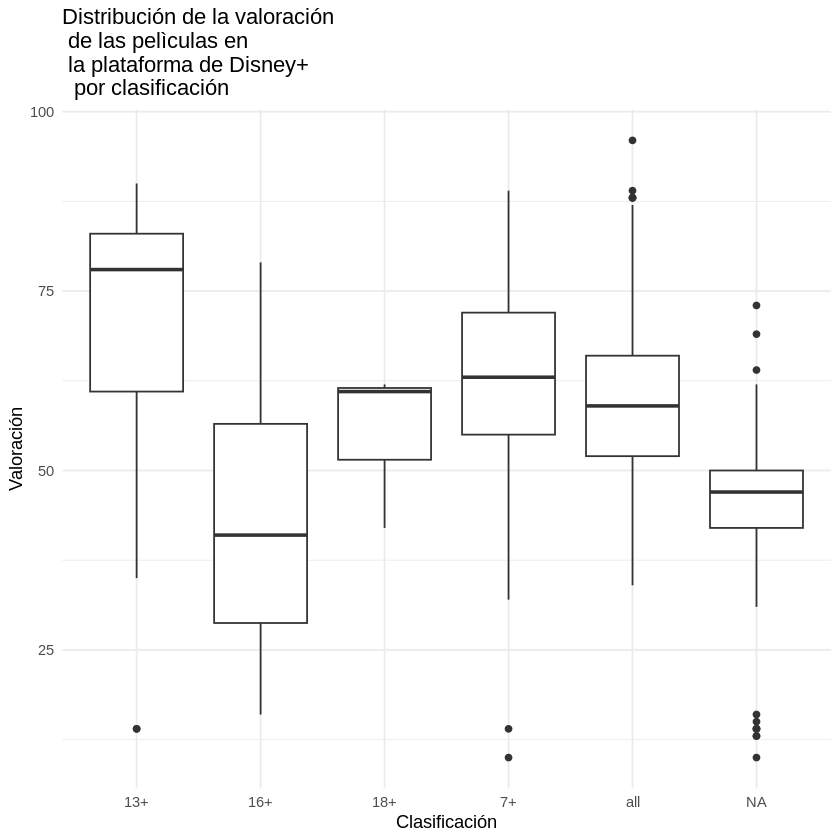

In [ ]:
movies.shows %>%
  # filtrado de sólo películas
  filter( Type == 0) %>%
  # filtrado de plataforma netflix
  filter(Disney. == 1) %>%
  ggplot(aes(x =  Age, y = Rotten.Tomatoes)) +
    geom_boxplot() +
   labs( title= "Distribución de la valoración  \n de las pelìculas en   \n la plataforma de Disney+   \n  por clasificación",
         y = "Valoración",
          x = "Clasificación") +
    theme_minimal()

b. Empleando solo las visualizaciones y suponiendo que solo te interesan las películas, ¿Cuál de las dos plataformas te parece que es mejor? Explica claramente tu respuesta.

Respuesta [Tengo sueño y pereza de escribir pero netflix]

## Actividad 2

1. ¿Cuál de los siguientes códigos pueden generar esta visualización?

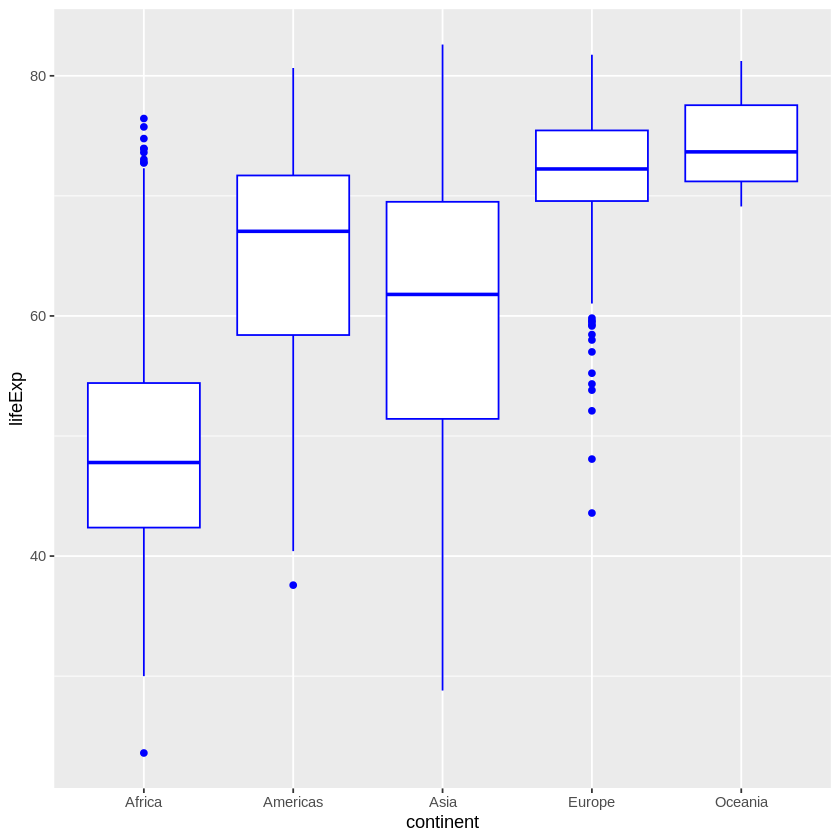

In [ ]:
ggplot(gapminder, aes(x = continent, y = lifeExp)) + geom_boxplot(col = "blue")

2. Si se desea visualizar la dispersión de una variable de clase numeric, la mejor opción es emplear `un histograma`. Según el [diagrama de geometrías](#scrollTo=djS9JNPslCW7)

3. ¿Cuál de los siguientes códigos pueden generar esta visualización?

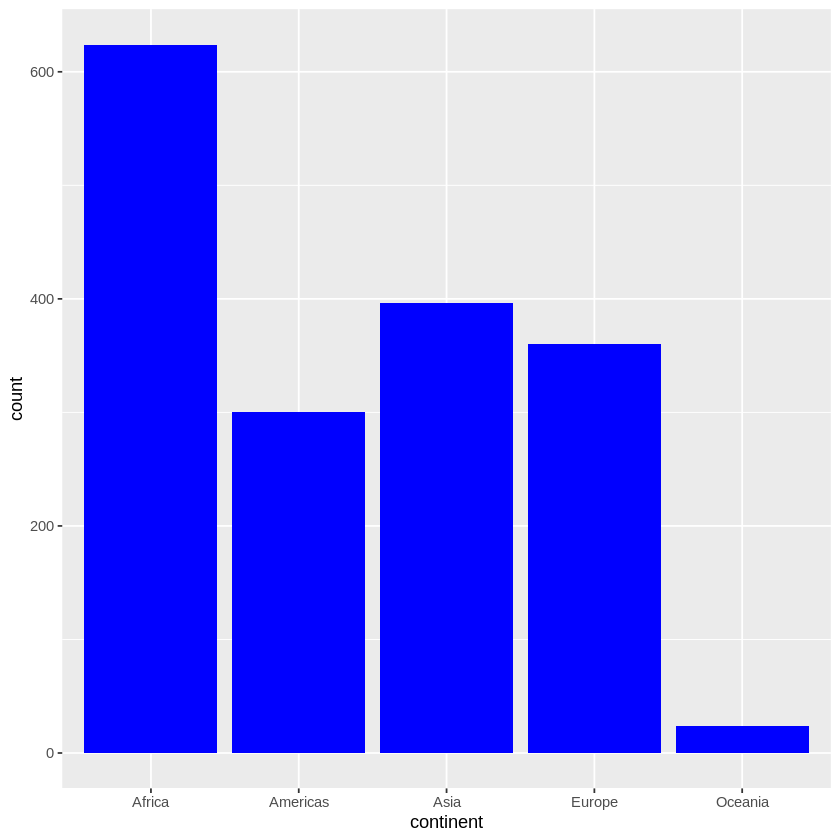

In [ ]:
ggplot(gapminder, aes(x = continent)) + geom_bar(fill = "blue")

4. Si se desea visualizar la dispersión de una variable de clase factor, la mejor opción es emplear `un gráfico de barras`.

# Resources

- [R Graph Library](https://r-graph-gallery.com/)
- [ggplot cheatsheet](https://rstudio.github.io/cheatsheets/data-visualization.pdf)
- [R Graphics Cookbook](https://r-graphics.org/)
- [Elegant Graphics for Data Analysis](https://ggplot2-book.org/)